In [38]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [39]:
clients=pd.read_csv('C:/Users/prana/Downloads/Tenzing Assesment Data Set.csv', sep = ',')

In [40]:
clients

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [41]:
clients.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [42]:
clients.corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


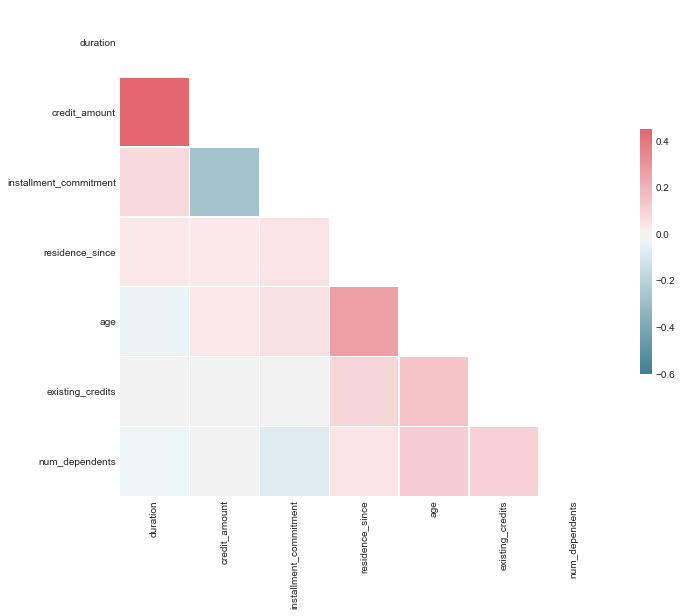

In [43]:
#Exploratory Data Analysis 
#Plotting a correlation matrix of all the variables 
corr = clients.corr()
#Masking the upper triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up a Matplotlib figure 
f, ax = plt.subplots(figsize=(11, 9))
#Setting up a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the seamap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax = 0.45, vmin =-0.6)

In [44]:
clients.cov()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,145.415006,2.127375e+04,1.008389,0.453418,-4.956995,-0.078600,-0.104069
credit_amount,21273.749776,7.967843e+06,-856.770805,90.120110,1050.522655,33.906901,17.520531
installment_commitment,1.008389,-8.567708e+02,1.251523,0.060876,0.741483,0.014003,-0.028844
residence_since,0.453418,9.012011e+01,0.060876,1.218193,3.344975,0.057142,0.017042
age,-4.956995,1.050523e+03,0.741483,3.344975,129.401285,0.980759,0.486857
existing_credits,-0.078600,3.390690e+01,0.014003,0.057142,0.980759,0.333685,0.022938
num_dependents,-0.104069,1.752053e+01,-0.028844,0.017042,0.486857,0.022938,0.131106


In [45]:
clients.isnull().values.any()

False

In [46]:
clients.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [47]:
Y = clients['class']

In [48]:
for i in range(len(Y)):
    if Y[i]=="bad":
        Y[i]=0
    else:
        Y[i]=1

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
X= clients.drop(['class'],1)

In [50]:
Y

0      1
1      0
2      1
3      1
4      0
5      1
6      1
7      1
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     0
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     0
      ..
970    1
971    1
972    0
973    0
974    1
975    1
976    1
977    1
978    0
979    0
980    0
981    0
982    1
983    0
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: object

In [51]:
DF_All=pd.get_dummies(X, drop_first="True")

In [52]:
##linear regression##

In [53]:
x_train, x_test,y_train,y_test = train_test_split(DF_All, Y, test_size=0.3, random_state=0) 
clf = linear_model.SGDRegressor() 
clf.fit(x_train, y_train)  
print(clf.intercept_)  
print(clf.coef_) 
y_pred_test = clf.predict(x_test) 
DF_All_a = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
DF_All_a  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
y_pred_train = clf.predict(x_train)
DF_All_b = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})  
DF_All_b 
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))   

[5.32e+10]
[ 1.48e+12 -1.43e+12  1.13e+11  2.71e+11  8.24e+11  7.44e+10  5.90e+10
  3.61e+10  1.19e+10  4.02e+10 -4.77e+08  9.68e+09  8.99e+10 -2.16e+10
  1.05e+11 -3.09e+09 -1.95e+10  1.17e+10 -1.45e+10 -8.46e+09 -2.83e+08
 -3.60e+09  4.18e+09 -3.93e+08 -1.04e+10  1.03e+10  9.99e+09  5.50e+10
 -1.20e+10 -1.16e+10  7.06e+09 -1.49e+09  3.72e+09 -4.44e+10  3.22e+10
 -1.53e+09  2.87e+10  3.00e+10  3.93e+10  5.42e+10  3.44e+09  1.28e+10
  4.82e+10 -6.82e+09  2.21e+10 -9.02e+09  2.64e+10  4.69e+10]
Mean Squared Error: 3.57219094621768e+31
Mean Squared Error: 3.812459892394158e+31


C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [29]:
## logistic ##

In [44]:
Y = clients['class']
for i in range(len(Y)):
    if Y[i]=="bad":
        Y[i]=0
    else:
        Y[i]=1

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
Y=Y.astype('int')

In [15]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(DF_All,Y, test_size=0.30, random_state=0)
logReg = LogisticRegression()
logReg.fit(x_train3, y_train3)
print(logReg.intercept_)  
print(logReg.coef_) 
y_pred_test3 = logReg.predict(x_test3) 
DF_All_1 = pd.DataFrame({'Actual': y_test3, 'Predicted': y_pred_test3})  
DF_All_1 
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred_test3)) 
print('accuracy_score:', accuracy_score(y_test3, y_pred_test3))
y_pred_train3 = logReg.predict(x_train3) 
DF_All_2 = pd.DataFrame({'Actual': y_train3, 'Predicted': y_pred_train3})  
DF_All_2
print('Mean Squared Error:', metrics.mean_squared_error(y_train3, y_pred_train3))  
print('accuracy_score:', accuracy_score(y_train3, y_pred_train3))



[0.82450783]
[[-3.19439355e-02 -1.03642729e-04 -2.56869062e-01  2.86062014e-02
   9.62696417e-03 -1.68404365e-01 -1.89024005e-01 -5.50636137e-01
   6.21278862e-01  1.18821142e+00  1.28653340e+00  8.59568953e-01
   6.24803515e-01 -2.78194067e-01 -5.02360030e-01  1.32137297e+00
  -5.90872188e-02 -2.17611802e-01  3.57573484e-01  2.03759440e-01
   3.13316983e-01 -6.18980199e-01  5.82904580e-01 -5.17103936e-02
  -7.92128087e-02  3.53168690e-01  8.68664344e-01  5.06847160e-01
  -5.10386698e-01  1.07895305e-01  3.38653406e-01 -2.50081371e-01
   2.73588825e-02  2.60772746e-01  1.23624818e+00  5.44225869e-01
  -4.04763944e-01  6.84034187e-01 -7.41877558e-04  4.01538310e-01
   4.07834159e-02 -1.93830744e-01 -7.51829932e-01  6.62669965e-01
   2.95139933e-01  4.42557462e-01  5.32144882e-01 -8.00784649e-01]]
Mean Squared Error: 0.26
accuracy_score: 0.74
Mean Squared Error: 0.20857142857142857
accuracy_score: 0.7914285714285715


In [39]:
Y = clients['class']

In [41]:
X = clients.drop('class', axis=1)

In [12]:
Y=Y.astype('int')

In [16]:
sns.set_style('white')

## Confusion Matrix

class_names = ['Bad credit', 'Good credit']

y_pred = logReg.predict(x_test3)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 45  41]
 [ 37 177]]
Normalized confusion matrix
[[0.52 0.48]
 [0.17 0.83]]


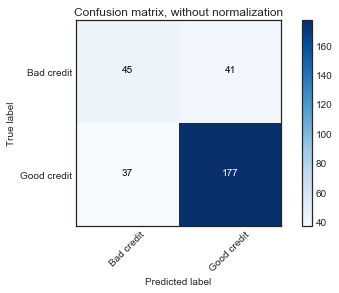

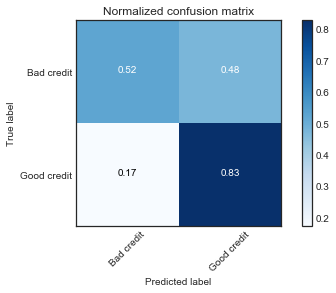

In [17]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Bad credit', 'Good credit']

y_pred = logReg.predict(x_test3)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test3, y_pred_test3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

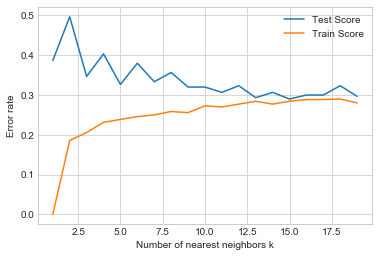

In [22]:
#Implementing KNN algorithm
#Experimenting with different values of k so that we choose the one which gives the optimal solution
sns.set_style('whitegrid')
#fig, axs = plt.subplots(3,1, figsize=(8, 20), facecolor='w', edgecolor='k', sharex=True, sharey=True)

#axs = axs.ravel()

kvalue = range(1,20,1)
    
#for k in range(0, len(algo)):
    
error_test=[]
error_train=[]
for i in range(0, len(kvalue)):
    knn = KNeighborsClassifier(n_neighbors= kvalue[i])
    knn.fit(x_train3, y_train3)

    error_test.append(zero_one_loss(y_test3, knn.predict(x_test3)))
    error_train.append(zero_one_loss(y_train3, knn.predict(x_train3)))

    

plt.plot(kvalue, error_test)
plt.plot(kvalue, error_train)
plt.xlabel('Number of nearest neighbors k')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [23]:
knn = KNeighborsClassifier(n_neighbors= 5, p=2)
knn.fit(x_train3, y_train3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix, without normalization
[[ 45  41]
 [ 37 177]]
Normalized confusion matrix
[[0.52 0.48]
 [0.17 0.83]]


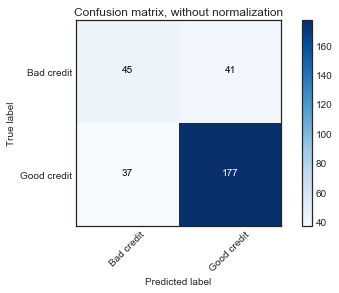

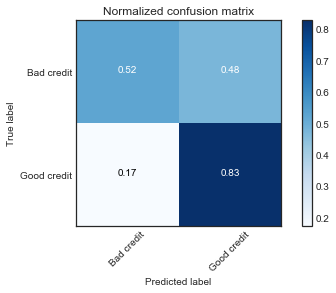

In [24]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Bad credit', 'Good credit']

y_pred = knn.predict(x_test3)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test3, y_pred_test3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()